**Which day of the week saw the most arrests and why?**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/oshaf23/OpenDataSets/main/NYPD_Arrest_Data__Year_to_Date_.csv')

In [3]:
df.head()

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column
0,234233843,09/29/2021,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003)
1,234129823,09/27/2021,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008)
2,234040747,09/25/2021,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003)
3,234047720,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1006537,244511,40.837782,-73.919458,POINT (-73.91945797099999 40.83778161800007)
4,234042526,09/25/2021,101.0,ASSAULT 3,344.0,ASSAULT 3 & RELATED OFFENSES,PL 1200001,M,B,44,0,25-44,M,BLACK,1007418,243859,40.835990,-73.916276,POINT (-73.91627635999998 40.83598980000005)


In [4]:
df['ARREST_DATE'] = pd.to_datetime(df['ARREST_DATE']) 

In [5]:
df['ARREST_WEEKDAY'] = df['ARREST_DATE'].dt.day_name()

In [6]:
df.head(3)

,ARREST_KEY,ARREST_DATE,PD_CD,PD_DESC,KY_CD,OFNS_DESC,LAW_CODE,LAW_CAT_CD,ARREST_BORO,ARREST_PRECINCT,JURISDICTION_CODE,AGE_GROUP,PERP_SEX,PERP_RACE,X_COORD_CD,Y_COORD_CD,Latitude,Longitude,New Georeferenced Column,ARREST_WEEKDAY
0,234233843,2021-09-29,105.0,STRANGULATION 1ST,106.0,FELONY ASSAULT,PL 1211200,F,B,42,0,25-44,M,BLACK,1009231,240290,40.826189,-73.909738,POINT (-73.90973778899996 40.82618898100003),Wednesday
1,234129823,2021-09-27,157.0,RAPE 1,104.0,RAPE,PL 1303501,F,K,77,0,25-44,M,BLACK,1003606,185050,40.674583,-73.930222,POINT (-73.93022154099998 40.67458330800008),Monday
2,234040747,2021-09-25,109.0,"ASSAULT 2,1,UNCLASSIFIED",106.0,FELONY ASSAULT,PL 1200501,F,Q,101,0,25-44,M,BLACK,1049232,159210,40.603441,-73.765986,POINT (-73.76598558899997 40.60344094100003),Saturday


In [7]:
df['ARREST_BORO'].value_counts()

K    31004
M    28948
B    25312
Q    24654
S     5381
Name: ARREST_BORO, dtype: int64

In [8]:
conditions = [
              (df['ARREST_BORO']=='K'),
              (df['ARREST_BORO']=='M'),
              (df['ARREST_BORO']=='B'),
              (df['ARREST_BORO']=='Q'),
              (df['ARREST_BORO']=='S')
]

In [9]:
values = ['Brooklyn','Manhattan','Bronx','Queens','Staten Island']

In [10]:
df['ARREST_BOROUGH'] = np.select(conditions,values)

In [11]:
df['ARREST_BOROUGH'].value_counts()

Brooklyn         31004
Manhattan        28948
Bronx            25312
Queens           24654
Staten Island     5381
Name: ARREST_BOROUGH, dtype: int64

In [12]:
df2 = df[['ARREST_KEY','ARREST_DATE','ARREST_WEEKDAY','ARREST_BOROUGH','PERP_SEX','PERP_RACE']]

In [13]:
df2.head(3)

,ARREST_KEY,ARREST_DATE,ARREST_WEEKDAY,ARREST_BOROUGH,PERP_SEX,PERP_RACE
0,234233843,2021-09-29,Wednesday,Bronx,M,BLACK
1,234129823,2021-09-27,Monday,Brooklyn,M,BLACK
2,234040747,2021-09-25,Saturday,Queens,M,BLACK


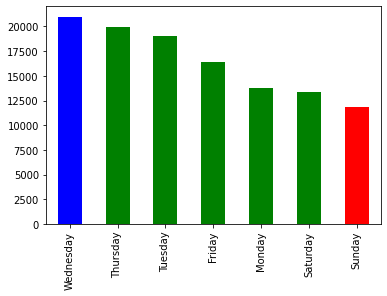

In [16]:
Weekday = df2['ARREST_WEEKDAY'].value_counts().plot(kind='bar',color=('blue','green','green','green','green','green','red'))

**As seen above, Wednesday saw the most arrests while Sunday saw the least. Also in general the middle of the week saw the most arrests while the weekend saw the least. A possible explanation might be that there are less cops that work on the weekends**

# Other Analysis

In [14]:
df2['ARREST_DATE'].value_counts()

2021-09-21    701
2021-01-06    634
2021-07-14    632
2021-03-10    629
2021-07-22    627
             ... 
2021-04-04    242
2021-05-29    238
2021-05-30    233
2021-04-26    230
2021-02-01    139
Name: ARREST_DATE, Length: 273, dtype: int64

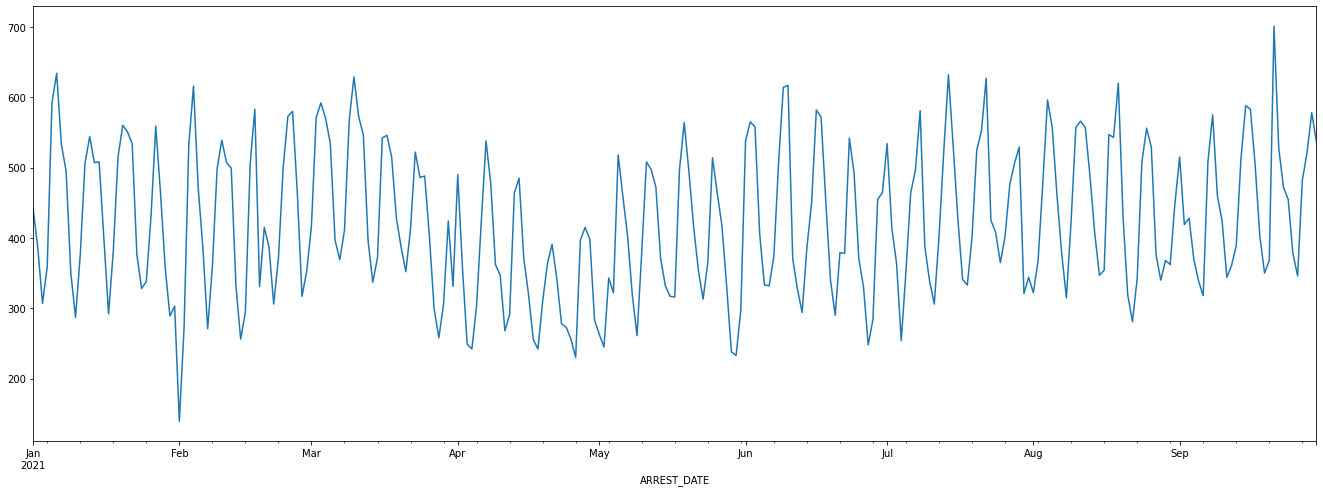

In [18]:
datedata = df2.groupby(['ARREST_DATE'])['ARREST_KEY'].count().plot(kind='line',figsize=(23,8))


**As seen above the most amount of arrests occurred on 09/21/2021 (701 Arrests) while the least occurred on 02/01/2021 (139 Arrests). It's also interesting how up and down and cyclical/weekly the data seems to go. It seems to coincide with the weekend data in that arrests seem to drop on the weekends.**

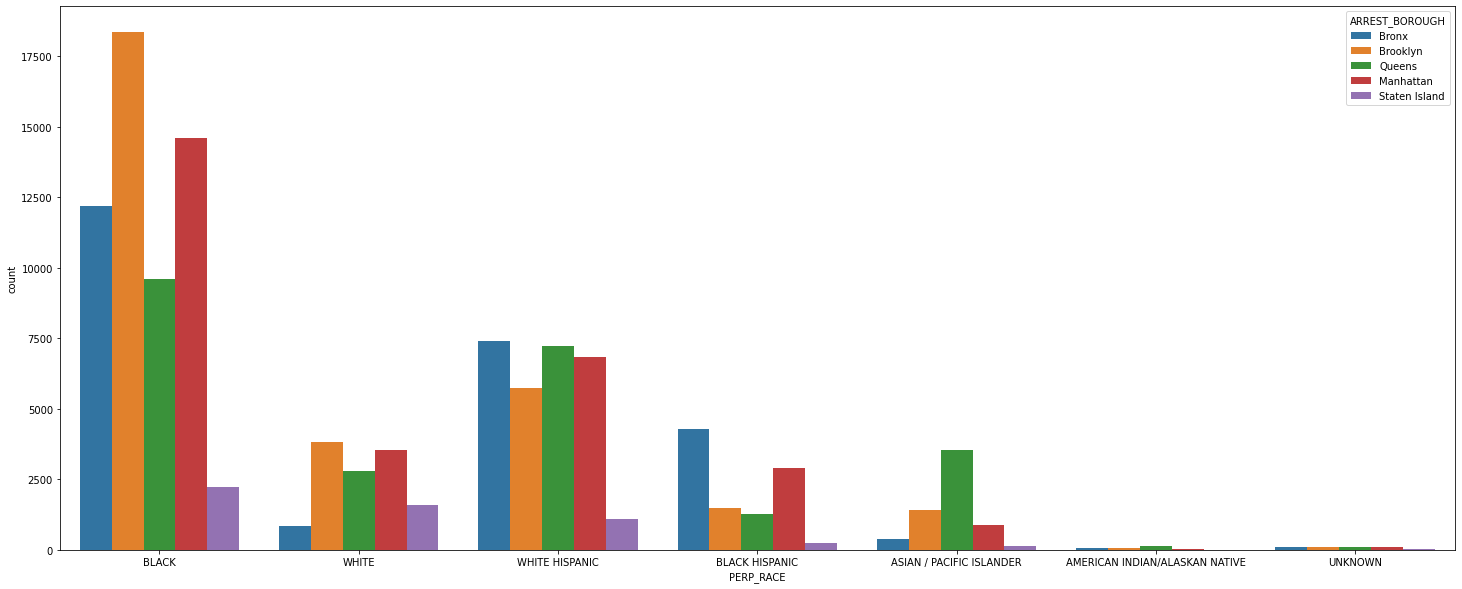

In [17]:
plt.figure(figsize=(25,10))
p = sns.countplot(x=df2.PERP_RACE, hue=df2.ARREST_BOROUGH)

**This data shows that in general Black men and women tend to be arrested in Brooklyn and at a much higher rate than all other races. Asian/Pacific Islander men and women are arrested most in Queens. While Hispanic (both white and black) are arrested most in the Bronx**